In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r"D:\DS\17. Support Vector Machines\SalaryData_Train(1).csv")
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test =pd.read_csv(r"D:\DS\17. Support Vector Machines\SalaryData_Test(1).csv")
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
train.isnull().sum()


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
train.describe()


,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
test.isnull().sum()


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
test.describe()


,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

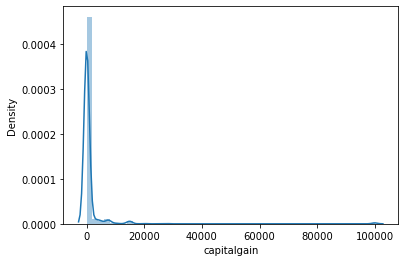

In [10]:
sns.distplot(train.capitalgain)


<AxesSubplot:>

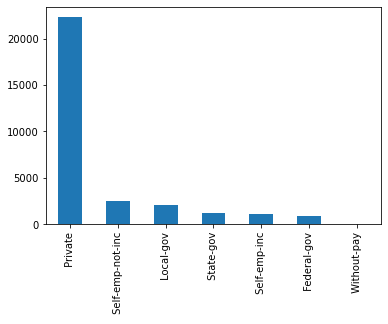

In [11]:
train.workclass.value_counts().plot(kind='bar')


<AxesSubplot:>

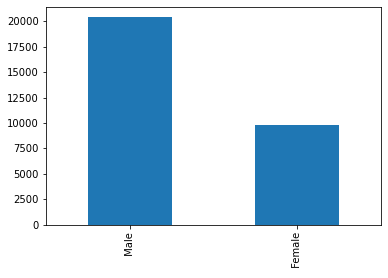

In [12]:
train.sex.value_counts().plot(kind='bar')


<AxesSubplot:>

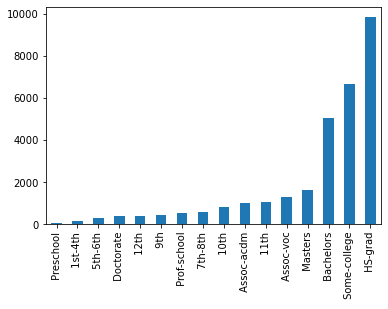

In [13]:
train.education.value_counts().sort_values().plot(kind='bar')


In [14]:
xtrain = train.iloc[:,:-1]
ytrain = train.iloc[:,-1]


In [15]:
xtest = test.iloc[:,:-1]
ytest = test.iloc[:,-1]

In [16]:
# Both dataset have same column name so need to encode categorical data and target column

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [17]:
oe = OrdinalEncoder()
le = LabelEncoder()

In [18]:
train_cat = xtrain.select_dtypes(object).columns

xtrain[train_cat] = oe.fit_transform(xtrain[train_cat])

In [19]:
xtrain.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5.0,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,37.0
1,50,4.0,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,37.0
2,38,2.0,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,37.0
3,53,2.0,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,37.0
4,28,2.0,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0


In [20]:
ytrain = le.fit_transform(ytrain)
ytest = le.fit_transform(ytest)

In [21]:
test_cat = xtest.select_dtypes(object).columns

xtest[test_cat] = oe.fit_transform(xtest[test_cat])

In [22]:
xtest.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2.0,1.0,7,4.0,6.0,3.0,2.0,1.0,0,0,40,37.0
1,38,2.0,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,50,37.0
2,28,1.0,7.0,12,2.0,10.0,0.0,4.0,1.0,0,0,40,37.0
3,44,2.0,15.0,10,2.0,6.0,0.0,2.0,1.0,7688,0,40,37.0
4,34,2.0,0.0,6,4.0,7.0,1.0,4.0,1.0,0,0,30,37.0


# SVM

In [23]:
from sklearn.svm import SVC


In [24]:
svm = SVC()


In [25]:
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

print(f"Training AC: {svm.score(xtrain, ytrain)}\nTesting AC: {svm.score(xtest, ytest)}")

Training AC: 0.7960279831570571
Testing AC: 0.7964143426294821


# Hyperparameter Tuining


In [26]:
svm = SVC(C = 1.0, kernel='sigmoid')


In [27]:
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

print(f"Training AC: {svm.score(xtrain, ytrain)}\nTesting AC: {svm.score(xtest, ytest)}")


Training AC: 0.7558104837372767
Testing AC: 0.7567729083665339


In [28]:
svm = SVC(C = 1.0, kernel='poly')

svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)
print(f"Training AC: {svm.score(xtrain, ytrain)}\nTesting AC: {svm.score(xtest, ytest)}")


Training AC: 0.7769304731275488
Testing AC: 0.7795484727755644


In [29]:
svm = SVC(C = 1.0, kernel='rbf')

svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)
print(f"Training AC: {svm.score(xtrain, ytrain)}\nTesting AC: {svm.score(xtest, ytest)}")


Training AC: 0.7960279831570571
Testing AC: 0.7964143426294821
